贝叶斯定理：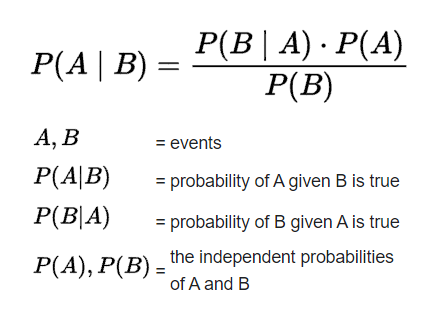

### 生成模型和判别模型
生成模型和判别模型是解决分类问题的两类基本思路。

生成模型是对特征和类的联合分布概率P(y,x)进行建模。这等价于对类的概率和给定类的情况下特征的概率进行建模。这等价于对类的概率和给定类的情况下特征的概率进行建模。生成概率对类如何生成进行建模。贝叶斯定理可以运用于生成模型来估计给定特征的情况下一个类的条件概率。 贝叶斯定理可以运用于生成模型来估计给定特征的情况下一个类的条件概率 

另一种对生成模型的解释：生成模型就是要学习x和y的联合概率分布P(x,y), 然后根据贝叶斯公式来求得条件概率P(y|x)，预测条件概率最大得y。

判别模型：它指的是学习一个决策边界对类进行判别。概率判别模型，会学习去估计条件概率P(y|x)，然后再根据要预测的值去估计最有可能的类。非概率判别模型会直接把特征映射到类上。

#### 生成模型：
HMM

朴素贝叶斯
#### 判别模型
逻辑回归

SVM

CRF

最邻近算法

一般的神经网络

生成模型为什么叫生成模型：因为生成模型背后的思想是：x是特征，y是标签，什么样的标签就会生成什么样的特征。当我们使用生成模型进行建模并对实例进行预测的时候，我们实际在比较什么样的y标签更有可能生成什么样的特征x，我们预测的结果就是更有可能生成x特征的y标签。

什么情况下该选择生成模型，什么情况下该选择判别模型：
当数据量较小的时候，选择生成模型更有可能得到较好的预测结果

当数据量大的时候，判别模型往往会有比较好的performance。

为什么：生成模型可以被用于生成新的数据实例。更重要的是，因为生成模型对类如何生成数据进行建模，生成模型相比判别模型有更大的盘查。这个建模步骤的引入对模型加了更对的假设。在这些假设前提下，生成模型可以更稳健地扰乱训练数据，并在训练数据很缺乏时比判别模型性能更佳。生成模型的缺点也正在此，当数据量更加后，生成模型做出的假设可能会阻止生成模型学习到数据集中蕴含的更多的特征，从而使得预测结果准确率降低。

贝叶斯定理更自然的形式：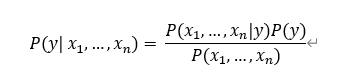 

贝叶斯定理中的两个核心公式：
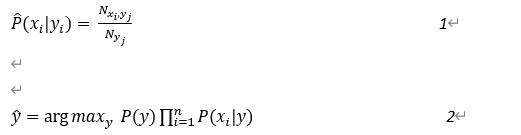

在公式中，y表示正向类，x1是实例的第一个特征，n是特征的数量。P(B)对于所有输入是一个常量，因为在训练数据集中观测到一个特定特征的概率对于不同的测试实例来说并不会有所不同，所以我们可以忽略。这里出现了两个项目：先验类概率P(y)以及条件概率P(x_1,……,x_n|y)。朴素贝叶斯通过极大化一个后验估计来估计这两个项目。P(y)是训练集中每个类出现的频率。对于类别特征，p(x_i|y)是属于该类的训练实例特征的频率。

朴素贝叶斯之所以有朴素二字，是因为该算法假设对响应变量来说所有特征都条件独立。

即：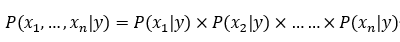
这一假设使得朴素贝叶斯算法变得很简单，但是可能会牺牲一定的分类准确性。

朴素贝叶斯的算法原理：就是根据上面的公式2来做的。在一般形式的贝叶斯原理表现中，分母即p(x_1, x_2, ……, x_n)是一个定值，就是求各个特征在样本数据集中出现的频率的乘积。要比较的就是分子的大小，即就是公式2的大小。公式1给出的是公式2中每一项的求法。 
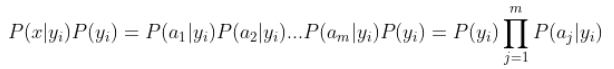
在公式中所有的x表示的都是特征，y表示的是要预测的类。我们要做的就是找到各个类下对应特征出现的概率就构成了公式二中的每一项，最后再乘该类在所有类别中出现的概率，就可以根据该结果进行判断。

朴素贝叶斯的变体最有可能在它们对于分布P(x_i|y)的假设上有所不同，因此他们能够学习的特征类型也有所不同。多项式朴素贝叶斯适合类别特征；高斯朴素贝叶斯适合连续特征，它假设每个特征对于每个类都符合正态分布。伯努利朴素贝叶斯适合于所有特征均为二元值得情形。

朴素贝叶斯的优缺点：

优点：
1、算法逻辑简单，易于实现

2、分类过程中时空开销小

3、朴素贝叶斯中做出的假设条件很苛刻。但是在真实数据集中即使该假设不成立时，朴素贝叶斯仍然可以有效地判别线性可分类，并且当训练数据缺乏时性能通常都优于判别模型

缺点：
1、当数据集中属性个数较多或者属性之间地关系较大的时候，贝叶斯分类的效果并不是很好。
由于引入了很多假设，但是当数据集过大的时候，这些假设可能会阻止生成模型进行学习。

朴素贝叶斯也假设训练实例之间独立同分布。这意味着训练实例相互独立，并且来源于同一概率分布。

### 下面用一个例子来说明

In [45]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [46]:
X, y = load_breast_cancer(return_X_y = True)

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

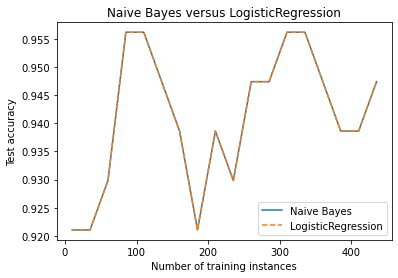

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
lr = LogisticRegression()
nb = GaussianNB()

lr_scores = []
nb_scores = []

train_sizes = range(10, len(X_train), 25)

for train_size in train_sizes:
    # stratify的意思就是要保证在训练集中和测试集中的数据都是按比例分配的。比如y中有1000个数据实例。其中A类300，B类500，C类200。比例为3：5：2。这就是说要保证训练集和测试集中的各个类之间的比例也都为这个比例的情况下分配对应数量的数据。
    X_slice, _, y_slice, _ = train_test_split(X_train, y_train, train_size = train_size, stratify = y_train,random_state = 42)
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))
    lr.fit(X_slice, y_slice)
    lr_scores.append(nb.score(X_test, y_test))
    
plt.plot(train_sizes, nb_scores, label = 'Naive Bayes')
plt.plot(train_sizes, lr_scores, linestyle = '--', label = 'LogisticRegression')
plt.title('Naive Bayes versus LogisticRegression')
plt.xlabel('Number of training instances')
plt.ylabel('Test accuracy')
plt.legend()
plt.show()


In [31]:
df = pd.read_csv('./chapter 7/pima-indians-diabetes.data', header = None)

In [37]:
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
y = df[8]

In [39]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64

In [41]:
X = df.drop([8],axis = 1)

In [42]:
X

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 31)

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

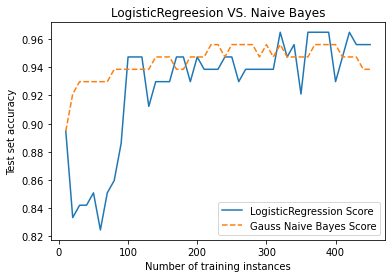

In [52]:
lr = LogisticRegression()
nb = GaussianNB()
lr_scores = []
nb_scores = []
train_sizes = range(10, len(X_train), 10)
for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, y_train, train_size = train_size, stratify = y_train, random_state = 31)
    lr.fit(X_slice, y_slice)
    lr_scores.append(lr.score(X_test, y_test))
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))

plt.plot(train_sizes, lr_scores, label = 'LogisticRegression Score')
plt.plot(train_sizes, nb_scores, linestyle = '--', label = 'Gauss Naive Bayes Score')
plt.legend()
plt.title("LogisticRegreesion VS. Naive Bayes")
plt.xlabel('Number of training instances')
plt.ylabel('Test set accuracy')
plt.show()